<a href="https://colab.research.google.com/github/A24bhi/WALMART-PROJECT/blob/main/WalMartProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Walmart.csv")

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#Data Cleaning

In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
new_col = df.select_dtypes(exclude='object')

In [ ]:
new_col.drop(['Store','Date','Holiday_Flag'],inplace=True,axis=1)

In [ ]:
new_col.columns

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], dtype='object')

In [ ]:
re_col = df.select_dtypes(include='object')

In [ ]:
re_col.head()

""
0
1
2
3
4


In [ ]:
re_col= df[['Store','Holiday_Flag']]

In [ ]:
re_col.head()

,Store,Holiday_Flag
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [ ]:
#Corr

In [ ]:
corr = new_col.corr()

In [ ]:
corr = corr['Weekly_Sales']

In [ ]:
corr.drop('Weekly_Sales',inplace=True)

In [ ]:
corr

,Weekly_Sales
Temperature,-0.063810
Fuel_Price,0.009464
CPI,-0.072634
Unemployment,-0.106176


In [ ]:
# Here, No column has strong correlation with weekly sales. So, I am  going to consider weak correlations

In [ ]:
abs(corr)>0.05

,Weekly_Sales
Temperature,True
Fuel_Price,False
CPI,True
Unemployment,True


In [ ]:
# Here just drop the Fuel_Price Column due to it doesnt have any weak corr with the weakly sales

In [ ]:
new_col.drop('Fuel_Price',axis=1,inplace=True)

In [ ]:
df.drop('Fuel_Price',axis=1,inplace=True)

In [ ]:
# Finding OutLiers

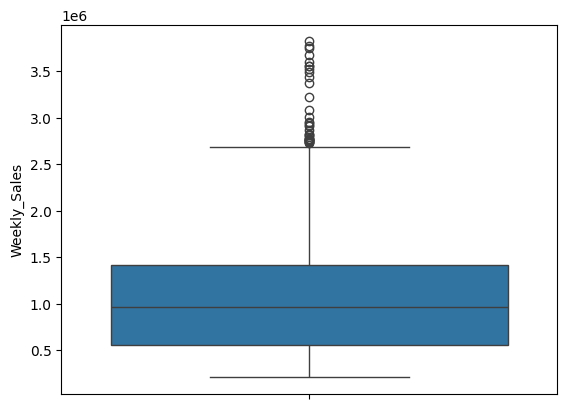

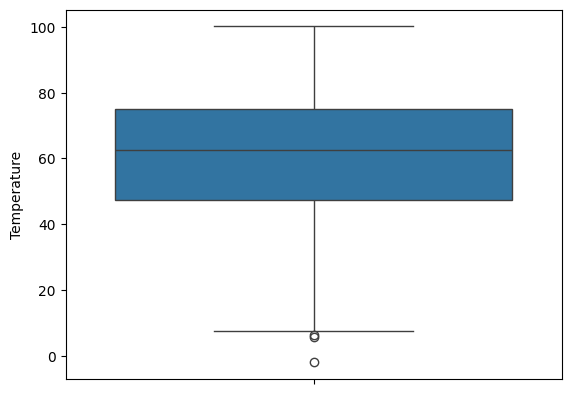

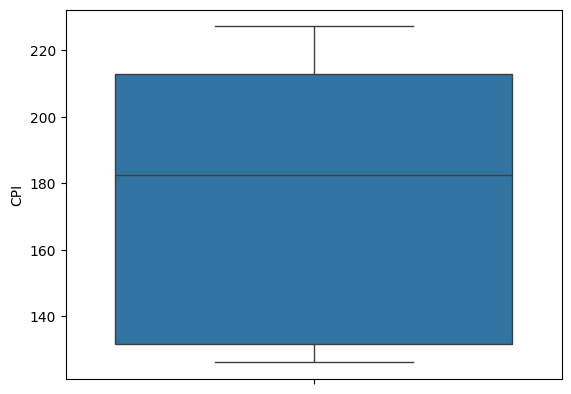

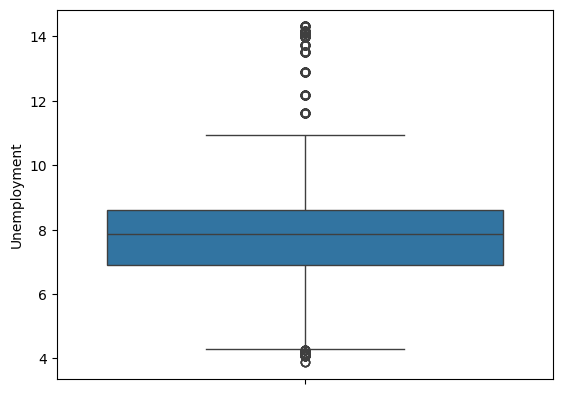

In [ ]:
for col in new_col.columns:
  sns.boxplot(new_col[col])
  plt.show()

In [ ]:
# CHecking whether data is in Normal Distribution or not

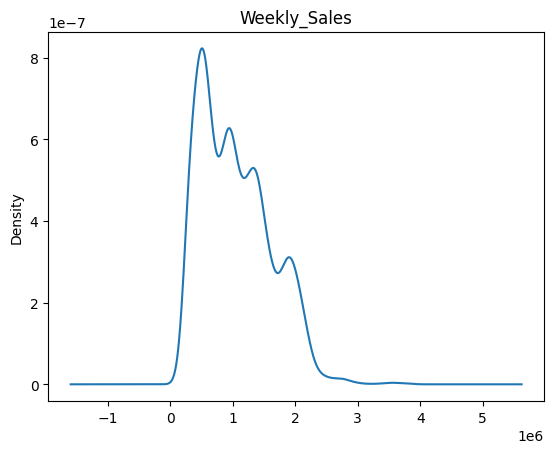

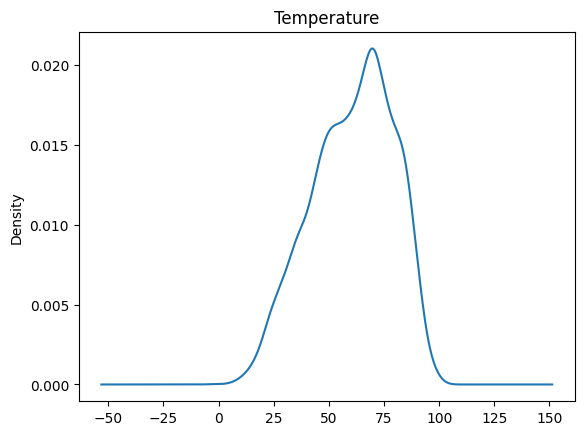

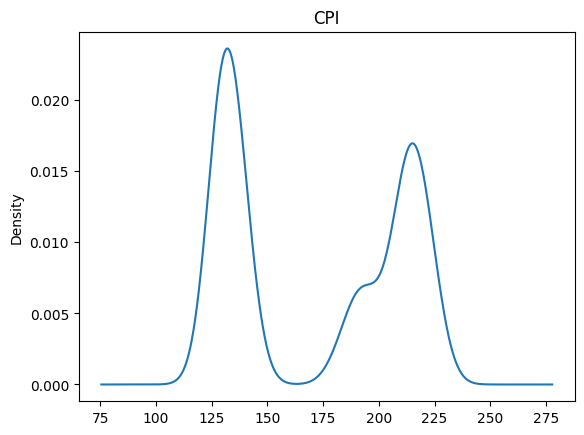

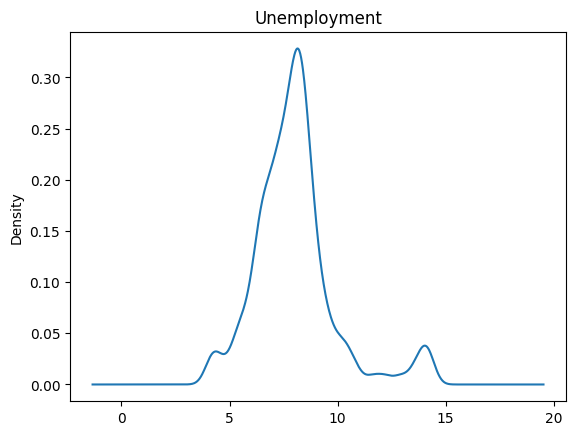

In [ ]:
for col in new_col.columns:
  df[col].plot(kind='kde')
  plt.title(col)
  plt.show()

In [ ]:
# So, Weekly_Sales and CPI are not  Normally Distributed

In [ ]:
# Statistical Test-Shapiro-Wilk Test

In [ ]:
from scipy.stats import shapiro

In [ ]:
for col in new_col.columns:
  stat,p = shapiro(new_col[col])
  alpha = 0.05
  if p>alpha:
    print(f'{col} data is normally distributed')
  else:
    print(f'{col} data is not normally Distributed')

Weekly_Sales data is not normally Distributed
Temperature data is not normally Distributed
CPI data is not normally Distributed
Unemployment data is not normally Distributed


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6435.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
for col in re_col.columns:
  print(f'{col}:\n')
  print(re_col[col].value_counts())
  print(f'\n')


Store:

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64


Holiday_Flag:

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64




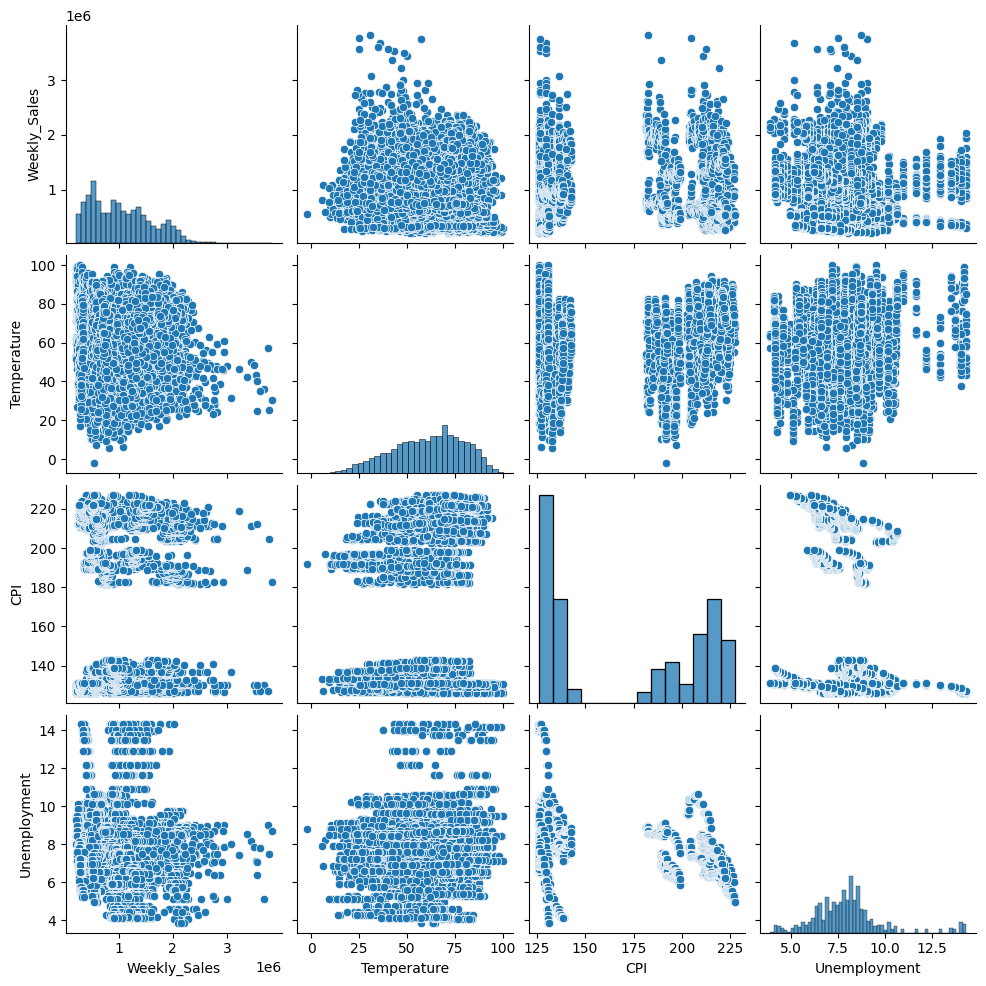

In [ ]:
sns.pairplot(new_col)
plt.show()

In [ ]:
corr_mat= new_col.corr()

<Axes: >

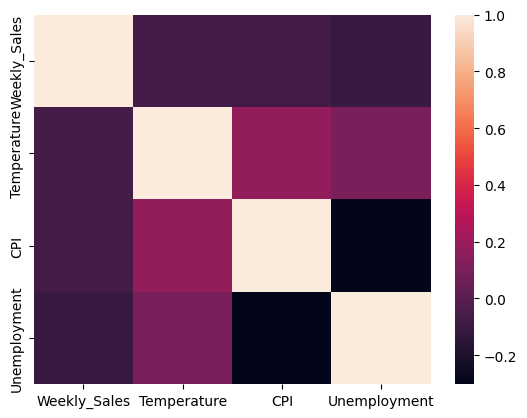

In [ ]:
sns.heatmap(data= corr_mat)

In [ ]:
abs(corr_mat.drop('Weekly_Sales', axis=1))>0.5

,Temperature,CPI,Unemployment
Weekly_Sales,False,False,False
Temperature,True,False,False
CPI,False,True,False
Unemployment,False,False,True


In [ ]:
Q1= np.percentile(df['Temperature'], 25)
Q2= np.percentile(df['Temperature'], 50)
Q3= np.percentile(df['Temperature'], 75)

print(f' Q1= {Q1}\nQ2= {Q2}\nQ3= {Q3}')

IQR= Q3- Q1

low_limit= Q1- 1.5*IQR
print(f'\nLower Limit: {low_limit}')

 Q1= 47.46
Q2= 62.67
Q3= 74.94

Lower Limit: 6.240000000000002


In [ ]:
df[df['Temperature']<low_limit]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment
910,7,2011-02-04,558027.77,0,-2.06,191.762589,8.818
2336,17,2011-01-07,1083071.14,0,6.23,127.191774,6.866
3626,26,2011-01-28,817485.14,0,5.54,133.105968,7.907


In [ ]:
df.shape

(6435, 7)

In [ ]:
del_index= df[df['Temperature']<low_limit].index
del_index

Index([910, 2336, 3626], dtype='int64')

In [ ]:
df.drop(del_index, inplace = True)

In [ ]:
Q1= np.percentile(df['Unemployment'], 25)
Q2= np.percentile(df['Unemployment'], 50)
Q3= np.percentile(df['Unemployment'], 75)

print(f' Q1= {Q1}\nQ2= {Q2}\nQ3= {Q3}')

IQR= Q3- Q1

low_limit= Q1- 1.5*IQR
print(f'\nLower Limit: {low_limit}')
upper_limit= Q3 + 1.5*IQR
print(f'\nUpper Limit: {upper_limit}')

 Q1= 6.891
Q2= 7.874
Q3= 8.622

Lower Limit: 4.2945

Upper Limit: 11.218499999999999


In [ ]:
df[ (df['Unemployment']<low_limit) | (df['Unemployment']>upper_limit) ]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment
555,4,2012-07-06,2224499.28,0,80.37,130.719633,4.077
556,4,2012-07-13,2100252.61,0,76.86,130.683000,4.077
557,4,2012-07-20,2175563.69,0,79.14,130.701290,4.077
558,4,2012-07-27,2048613.65,0,81.06,130.719581,4.077
559,4,2012-08-03,2174514.13,0,83.86,130.737871,4.077
...,...,...,...,...,...,...,...
5715,40,2012-09-28,919595.44,0,50.98,138.739500,4.156
5716,40,2012-10-05,1069112.00,0,57.21,138.825600,4.145
5717,40,2012-10-12,982523.26,0,47.35,138.911700,4.145
5718,40,2012-10-19,918170.50,0,46.33,138.833613,4.145


In [ ]:
df.shape

(6432, 7)

In [ ]:
del_index=df[ (df['Unemployment']<low_limit) | (df['Unemployment']>upper_limit) ].index

In [ ]:
del_index

Index([ 555,  556,  557,  558,  559,  560,  561,  562,  563,  564,
       ...
       5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719],
      dtype='int64', length=481)

In [ ]:
df.drop(del_index,inplace= True)

In [ ]:
df.shape

(5951, 7)

In [ ]:
#a If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [ ]:
corr['Unemployment']

-0.10617608965795235

In [ ]:
# A weak Negative Corr

In [ ]:
ws_unemploy= df.groupby('Store')[['Unemployment','Weekly_Sales']].corr().reset_index()[['Store','Weekly_Sales']]

In [ ]:
ws_unemploy.head()

,Store,Weekly_Sales
0,1,-0.097955
1,1,1.000000
2,2,0.066325
3,2,1.000000
4,3,-0.230413


In [ ]:
ws_unemploy.drop_duplicates('Store', keep='first', inplace= True)

In [ ]:
ws_unemploy.sort_values(by='Weekly_Sales', ascending= False, inplace=True)

In [ ]:
ws_unemploy.head()

,Store,Weekly_Sales
70,36,0.833734
68,35,0.483865
40,21,0.218367
26,14,0.210786
58,30,0.201862


In [ ]:
# 36, 35, 21, 14, and 30 stores are suffering the most

In [ ]:
#B) If the weekly sales show a seasonal trend, when and what could be the reason?

In [ ]:
temp=df[['Date','Weekly_Sales']]

In [ ]:
temp.head()

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68


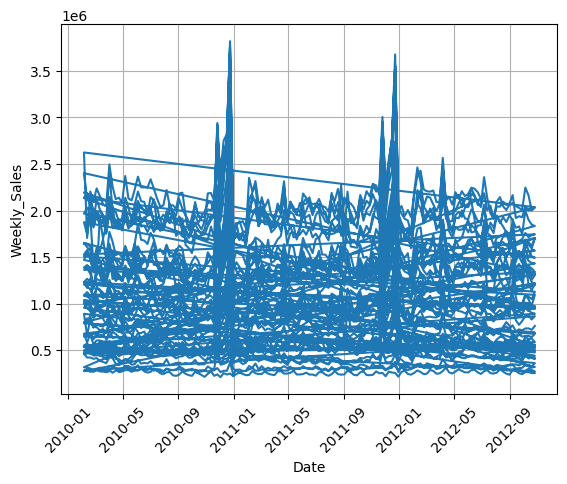

In [ ]:
plt.plot(temp['Date'], temp['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.xticks(rotation= 45)
plt.grid(True)

plt.show()

In [ ]:
# Here is the sales are at peak in December of every year.
#It maybe because the stores have huge discount due to end of year sale and Christmas and New Year.

In [ ]:
#C

In [ ]:
corr

,Weekly_Sales
Temperature,-0.063810
Fuel_Price,0.009464
CPI,-0.072634
Unemployment,-0.106176


In [ ]:
#D

In [ ]:
ws_cpi= df.groupby('Store')[['CPI','Weekly_Sales']].corr().reset_index()[['Store','Weekly_Sales']]

In [ ]:
ws_cpi.drop_duplicates('Store',keep='first', inplace= True)

In [ ]:
ws_cpi.sort_values(by='Weekly_Sales', ascending= False, inplace= True)

In [ ]:
ws_cpi.head()

,Store,Weekly_Sales
86,44,0.740150
76,39,0.428043
80,41,0.392293
6,4,0.362972
32,17,0.362670


In [ ]:
#44, 39, 41, 4 and 17  Store are the most affected stores by the correlation of Weekly_Sales and CPI.


In [ ]:
# E

In [ ]:
total_sales= df.groupby('Store', as_index=False)['Weekly_Sales'].sum()

In [ ]:
total_sales.sort_values(by= 'Weekly_Sales',ascending=False, inplace= True)

In [ ]:
top_5=total_sales.head().reset_index()
top_5

,index,Store,Weekly_Sales
0,19,20,3.013978e+08
1,13,14,2.889999e+08
2,12,13,2.865177e+08
3,1,2,2.753824e+08
4,9,10,2.716177e+08


In [ ]:
#Best performing stores according to historical data are 20, 14, 13, 2 and 10.

In [ ]:
# F

In [ ]:
worst_5= total_sales.tail()[::-1].reset_index()
worst_5

,index,Store,Weekly_Sales
0,37,38,7347378.89
1,11,12,16386710.79
2,27,28,21106767.80
3,32,33,37160221.96
4,43,44,43293087.84


In [ ]:
# The worst performing stores according to the historical data are 38, 12, 28, 33 and 44.

In [ ]:
(top_5['Weekly_Sales']-worst_5['Weekly_Sales']).to_list()

[294050413.57,
 272613200.54999995,
 265410936.0,
 238222219.02,
 228324626.04999998]

In [ ]:
# 2

In [ ]:
stores= list(top_5['Store'].values)
stores

[20, 14, 13, 2, 10]

In [ ]:
from prophet import Prophet

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,211.350143,8.106


In [ ]:
stores_dfs={}

for store in stores:
    condition= df['Store']==store
    stores_dfs[store]= df[condition][['Date','Weekly_Sales']].rename(columns= {'Date':'ds', 'Weekly_Sales':'y'})


In [ ]:
stores_dfs[20].head()

,ds,y
2717,2010-02-05,2401395.47
2718,2010-02-12,2109107.90
2719,2010-02-19,2161549.76
2720,2010-02-26,1898193.95
2721,2010-03-05,2119213.72


In [ ]:
future_predictions_dfs={}

for store in stores:
  model= Prophet()
  model.fit(stores_dfs[store])
  future= model.make_future_dataframe(periods=12, freq='W')
  future_predictions_dfs[store]=model.predict(future)
  stores_dfs[store]=stores_dfs[store].merge(future_predictions_dfs[store][['ds', 'yhat']], on='ds', how='outer')


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkafibref/s7q061_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkafibref/_q0uymbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22735', 'data', 'file=/tmp/tmpkafibref/s7q061_3.json', 'init=/tmp/tmpkafibref/_q0uymbt.json', 'output', 'file=/tmp/tmpkafibref/prophet_modelpao6ynby/prophet_model-20250127062307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:23:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:23:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

In [ ]:
stores_dfs[20]

,ds,y,yhat
0,2010-02-05,2401395.47,2.228794e+06
1,2010-02-12,2109107.90,2.238706e+06
2,2010-02-19,2161549.76,2.133870e+06
3,2010-02-26,1898193.95,2.036781e+06
4,2010-03-05,2119213.72,1.993690e+06
...,...,...,...
150,2012-12-16,NaN,3.051465e+06
151,2012-12-23,NaN,2.961220e+06
152,2012-12-30,NaN,2.548238e+06
153,2013-01-06,NaN,2.035127e+06


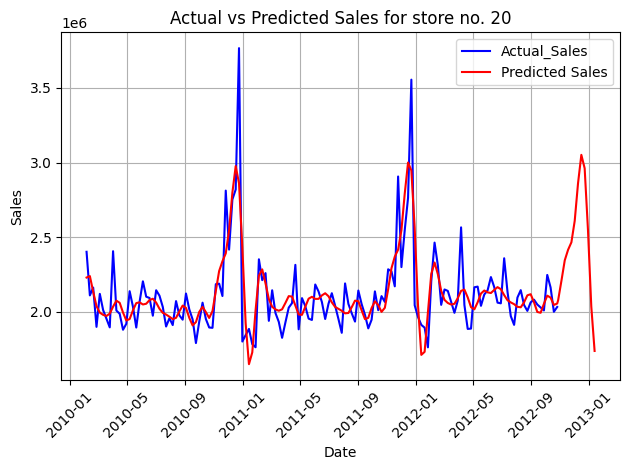

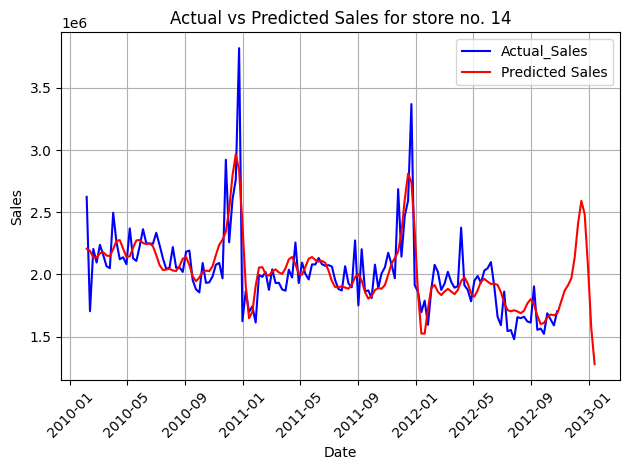

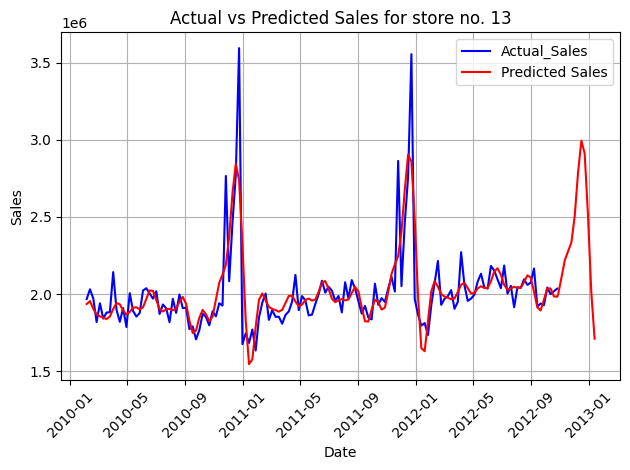

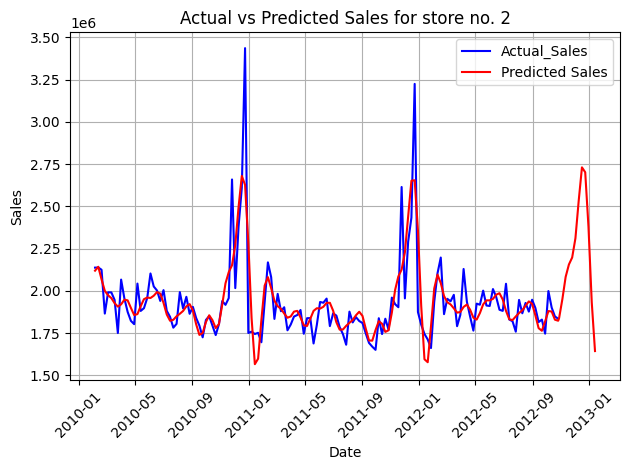

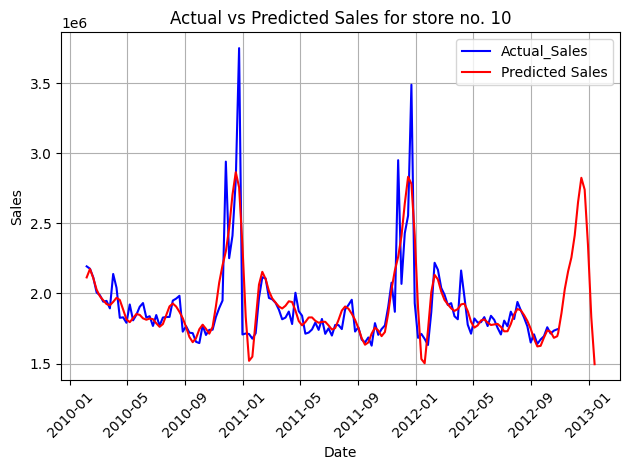

In [ ]:
for store in stores:

  plt.plot(stores_dfs[store]['ds'], stores_dfs[store]['y'], label='Actual_Sales', color='b')
  plt.plot(stores_dfs[store]['ds'], stores_dfs[store]['yhat'], label= 'Predicted Sales', color= 'r')
  plt.title(f'Actual vs Predicted Sales for store no. {store}')
  plt.xlabel('Date')
  plt.ylabel('Sales')
  plt.xticks(rotation= 45)
  plt.legend()
  plt.grid(True)

  #To ensure the plot fits within the figsize
  plt.tight_layout()
  plt.show()


In [ ]:
future_sales_dfs={}

for store in stores:

  future_sales_dfs[store]= stores_dfs[store][stores_dfs[store]['y'].isna()].reset_index()[['ds','yhat']].rename(columns= {'ds': 'Date', 'yhat':'Predicted_Sales'})
  print(f'Following is the future sales for the store no. {store}:\n')
  future_sales_dfs[store]['Predicted_Sales']= future_sales_dfs[store]['Predicted_Sales'].astype(int)
  display(future_sales_dfs[store])
  print('\n')

Following is the future sales for the store no. 20:



,Date,Predicted_Sales
0,2012-10-28,2076859
1,2012-11-04,2207911
2,2012-11-11,2344628
3,2012-11-18,2414922
4,2012-11-25,2465025
5,2012-12-02,2608734
6,2012-12-09,2860360
7,2012-12-16,3051464
8,2012-12-23,2961219
9,2012-12-30,2548237




Following is the future sales for the store no. 14:



,Date,Predicted_Sales
0,2012-10-28,1704719
1,2012-11-04,1790371
2,2012-11-11,1872676
3,2012-11-18,1913942
4,2012-11-25,1970894
5,2012-12-02,2139544
6,2012-12-09,2406800
7,2012-12-16,2591643
8,2012-12-23,2484893
9,2012-12-30,2067031




Following is the future sales for the store no. 13:



,Date,Predicted_Sales
0,2012-10-28,1998957
1,2012-11-04,2106611
2,2012-11-11,2218823
3,2012-11-18,2276264
4,2012-11-25,2335722
5,2012-12-02,2507159
6,2012-12-09,2787628
7,2012-12-16,2995155
8,2012-12-23,2912812
9,2012-12-30,2511802




Following is the future sales for the store no. 2:



,Date,Predicted_Sales
0,2012-10-28,1838893
1,2012-11-04,1950907
2,2012-11-11,2082144
3,2012-11-18,2155466
4,2012-11-25,2196903
5,2012-12-02,2310884
6,2012-12-09,2532402
7,2012-12-16,2730434
8,2012-12-23,2701500
9,2012-12-30,2378629




Following is the future sales for the store no. 10:



,Date,Predicted_Sales
0,2012-10-28,1717731
1,2012-11-04,1859012
2,2012-11-11,2030862
3,2012-11-18,2157239
4,2012-11-25,2256079
5,2012-12-02,2414480
6,2012-12-09,2650095
7,2012-12-16,2824550
8,2012-12-23,2740074
9,2012-12-30,2345041
